In [26]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import operator
from IPython.display import Image

In [27]:
from pymongo import MongoClient
client = MongoClient('mongodb://localhost:27017')
collection = client.test_database.coraltest

Enter the input Image: 690


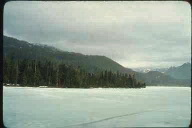

In [38]:
db = []
num = input('Enter the input Image: ')
for x in collection.find():
    db = np.array(x['distances'])
Image(str(num)+'.jpg')

In [39]:
inputImage = db[int(num)-1]
ut = np.sum(db,axis=1)
uq = np.sum(inputImage)

distance = np.zeros(10000*108).reshape(10000,108)
for i in range(10000):
    for j in range(108):
        distance[i,j] = (abs(db[i,j] - inputImage[j]))/(abs(db[i,j]+ut[i])+abs(inputImage[j]+uq))
distanceSum = np.sum(distance,axis=1)

In [40]:
keys = np.arange(len(distanceSum),dtype=int)

Imagedictionary = dict(zip(keys, distanceSum))
sorted_images = sorted(Imagedictionary.items(), key=operator.itemgetter(1))

In [41]:
i = 0;
Resultimages = []
ResultHists = np.zeros(13*108).reshape(13,108)
for key in sorted_images:
    if(i<=12):
        ResultHists[i]=db[key[0]]
        i = i +1
        imageName = str(key[0]+1)+'.jpg'
        Resultimages.append(imageName)
        print (imageName)
        Image(imageName)
    else:
        break;

690.jpg
8273.jpg
602.jpg
3431.jpg
3699.jpg
8293.jpg
6816.jpg
6574.jpg
673.jpg
1443.jpg
8288.jpg
7329.jpg
8300.jpg


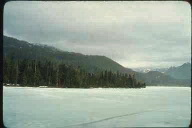

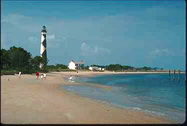

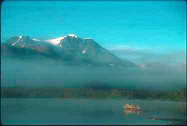

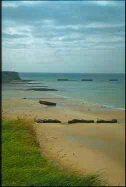

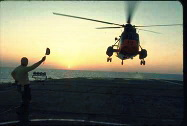

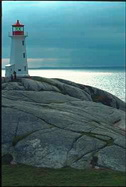

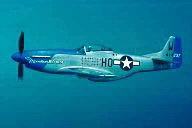

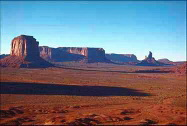

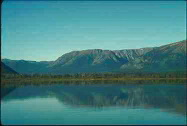

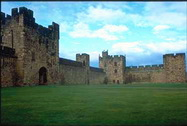

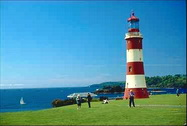

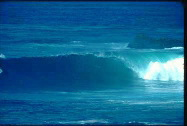

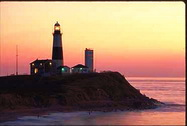

In [42]:
for ima in Resultimages:
    imageD = Image(ima)
    display(imageD)